# 💱 Currency Exchange ETL Project

This project aims to build a simple ETL (Extract – Transform – Load) pipeline using Python to fetch foreign currency exchange rate data from a public API, clean the data, and save it into a `.csv` file.

This data is useful for:
- Daily exchange rate analysis (USD to various currencies)
- Cross-country comparisons
- Financial reporting for export/import businesses
- Visualizing exchange rate trends over time

---

## 🔧 Technologies Used
- Python
- Jupyter Notebook
- Pandas
- Requests
- Matplotlib
- CSV File
- API [exchangerate.host](https://exchangerate.host)

---

## 📈 ETL Flow
1. **Extract** – Fetch exchange rate data from the API  
2. **Transform** – Clean and reshape the data into a tabular format  
3. **Load** – Save the data into a CSV file for further analysis  


In [1]:
import requests
import pandas as pd
import os
from datetime import datetime
import matplotlib.pyplot as plt

## 📥 Step 1: Extract – Retrieve Data from API

We will retrieve daily exchange rate data from `exchangerate.host`, using USD as the base currency.  
The API returns the data in JSON format, which we will convert into a Python dictionary.

In [3]:
def extract_data(base_currency="USD"):
    url = f"https://open.er-api.com/v6/latest/{base_currency}"
    response = requests.get(url)
    
    if response.status_code != 200:
        raise Exception(f"Failed to retrieve data. Status code: {response.status_code}")
    
    data = response.json()
    return data

# Call the function
raw_data = extract_data()
raw_data

{'result': 'success',
 'provider': 'https://www.exchangerate-api.com',
 'documentation': 'https://www.exchangerate-api.com/docs/free',
 'terms_of_use': 'https://www.exchangerate-api.com/terms',
 'time_last_update_unix': 1754524951,
 'time_last_update_utc': 'Thu, 07 Aug 2025 00:02:31 +0000',
 'time_next_update_unix': 1754612221,
 'time_next_update_utc': 'Fri, 08 Aug 2025 00:17:01 +0000',
 'time_eol_unix': 0,
 'base_code': 'USD',
 'rates': {'USD': 1,
  'AED': 3.6725,
  'AFN': 68.875605,
  'ALL': 83.967264,
  'AMD': 383.564921,
  'ANG': 1.79,
  'AOA': 918.454841,
  'ARS': 1333.67,
  'AUD': 1.538298,
  'AWG': 1.79,
  'AZN': 1.69933,
  'BAM': 1.680286,
  'BBD': 2,
  'BDT': 121.692418,
  'BGN': 1.680848,
  'BHD': 0.376,
  'BIF': 2976.98944,
  'BMD': 1,
  'BND': 1.28567,
  'BOB': 6.876905,
  'BRL': 5.493563,
  'BSD': 1,
  'BTN': 87.753822,
  'BWP': 14.279974,
  'BYN': 3.211476,
  'BZD': 2,
  'CAD': 1.374645,
  'CDF': 2898.854873,
  'CHF': 0.80645,
  'CLP': 964.612451,
  'CNY': 7.185909,
  'CO

## 🧹 Step 2: Transform – Clean and Prepare the Data

We will convert the JSON result into a clean pandas DataFrame.  
We will also add columns for the date and the base currency.

In [5]:
def transform_data(data):
    rates = data['rates']
    date_str = data['time_last_update_utc']
    base = data['base_code']
    
    # Convert date format to datetime
    date = pd.to_datetime(date_str, utc=True)
    
    # Create DataFrame from rates
    df = pd.DataFrame(rates.items(), columns=["Currency", "Rate"])
    df["Base"] = base
    df["Date"] = date

    # Sort by highest Rate
    df = df.sort_values(by="Rate", ascending=False).reset_index(drop=True)
    
    return df

# Transform raw data into clean tables
df_cleaned = transform_data(raw_data)
df_cleaned.head()

,Currency,Rate,Base,Date
0,LBP,89500.000000,USD,2025-08-07 00:02:31+00:00
1,IRR,42317.095156,USD,2025-08-07 00:02:31+00:00
2,VND,26161.411817,USD,2025-08-07 00:02:31+00:00
3,SLL,23056.126079,USD,2025-08-07 00:02:31+00:00
4,LAK,21628.437608,USD,2025-08-07 00:02:31+00:00


### 🔍 Transformation Process Explanation

In this step, the raw JSON data from the API is converted into a **DataFrame** using the `pandas` library. The steps include:

1. **Extracting exchange rate data (`rates`)** from the `'rates'` key, which contains a dictionary of currency-rate pairs.
2. **Retrieving the base currency (`base`)** and the last updated date (`time_last_update_utc`) to include in each row of the data.
3. **Converting the date into datetime format** for easier time-based analysis.
4. **Structuring the data into a DataFrame** with columns: `Currency`, `Rate`, `Base`, and `Date`.
5. **Sorting the DataFrame by the highest exchange rate** to make the data display more informative.
6. **Resetting the index** to clean up the DataFrame and prepare it for the next steps (visualization or file storage).

This transformation ensures that the stored data is clean, structured, and ready for further analysis or visualization.

## 💾 Step 3: Load – Save Data to CSV

The cleaned data will be saved into a `.csv` file in the `data/` folder, so it can be used in Excel, Tableau, or further analysis.

In [6]:
def load_data(df, filename="exchange_rates.csv"):
    # If the 'data' folder doesn't exist, create it
    if not os.path.exists("data"):
        os.makedirs("data")
    
    # Create the full file path
    filepath = os.path.join("data", filename)
    
    # Save the DataFrame to CSV without the index column
    df.to_csv(filepath, index=False)
    
    # Print confirmation
    print(f"✅ Data successfully saved to {filepath}")

# Save the file
load_data(df_cleaned)

✅ Data successfully saved to data\exchange_rates.csv


## 📊 Simple Visualization

We can view the top 10 currencies with the highest exchange rates against USD in a horizontal bar chart.

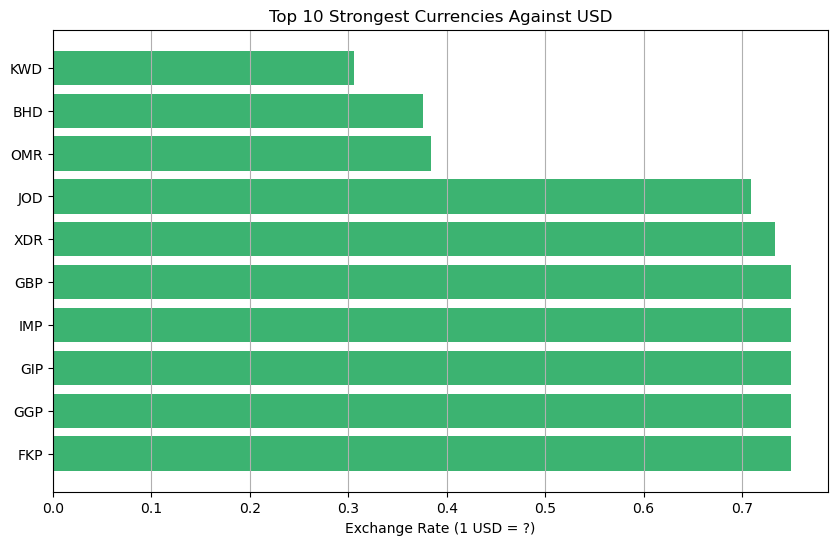

In [7]:
# Sort the data to get the 10 strongest currencies (lowest exchange rate) against USD
top_rates = df_cleaned.sort_values("Rate", ascending=True).head(10)

# Create horizontal bar chart
plt.figure(figsize=(10,6))
plt.barh(top_rates["Currency"], top_rates["Rate"], color='mediumseagreen')
plt.xlabel("Exchange Rate (1 USD = ?)")
plt.title("Top 10 Strongest Currencies Against USD")
plt.gca().invert_yaxis()  # Invert y-axis to have strongest on top
plt.grid(axis='x')        # Show grid on x-axis
plt.show()

### 💪 Top 10 Strongest Currencies Against USD

Based on exchange rate data as of July 23, 2025, the following currencies have the **lowest numerical exchange rate** against the USD — meaning 1 unit of these currencies is **worth more than 1 USD**.

#### 🥇 Strongest Currencies Against USD:

- **KWD (Kuwaiti Dinar)** – 1 USD ≈ 0.30 KWD  
  → 1 KWD ≈ 3.33 USD  
  The most valuable currency in the world, supported by large oil reserves and a stable economic system.

- **BHD (Bahraini Dinar)** – 1 USD ≈ 0.38 BHD  
- **OMR (Omani Rial)** – 1 USD ≈ 0.38 OMR  
  → Both come from Middle Eastern countries with strong economies driven by oil exports and political stability.

- **JOD (Jordanian Dinar)** – also has high value due to inflation control and tight monetary policies.

- Other strong currencies: **GBP (British Pound Sterling)** and **EUR (Euro)**, reflecting economic stability and global influence.


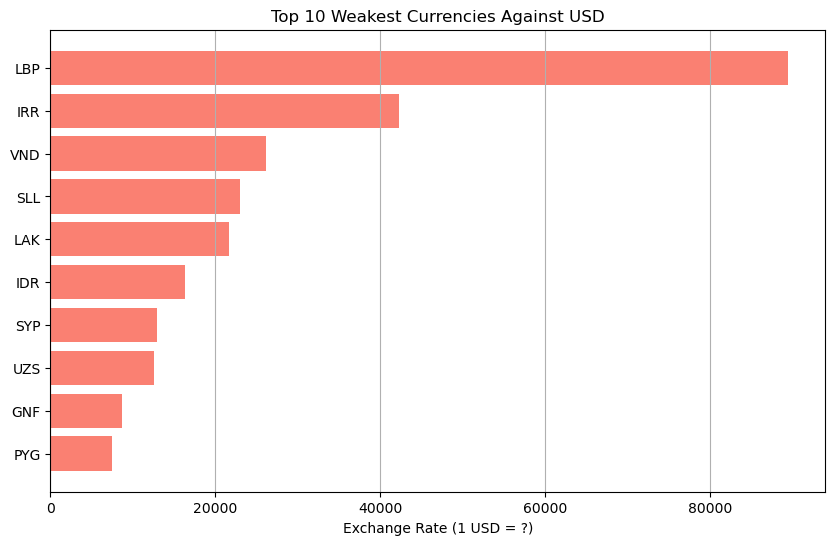

In [8]:
# Get the 10 currencies with the highest exchange rate (weakest against USD)
weakest_rates = df_cleaned.sort_values("Rate", ascending=False).head(10)

plt.figure(figsize=(10,6))
plt.barh(weakest_rates["Currency"], weakest_rates["Rate"], color='salmon')
plt.xlabel("Exchange Rate (1 USD = ?)")
plt.title("Top 10 Weakest Currencies Against USD")
plt.gca().invert_yaxis()
plt.grid(axis='x')
plt.show()

### 📌 Insight: Top 10 Weakest Currencies Against USD

Based on exchange rate data as of July 23, 2025, the following currencies have the highest exchange rate values (large numbers) against the USD — meaning 1 USD is equivalent to **tens of thousands of units of local currency**.

#### 🧾 Weakest Currencies Against USD:
- **LBP (Lebanese Pound)** — > 89,000 per USD → reflects financial crisis and hyperinflation in Lebanon.
- **IRR (Iranian Rial)** — around 42,000 per USD → impact of economic sanctions and high inflation.
- **VND (Vietnamese Dong)** and **IDR (Indonesian Rupiah)** also have high nominal exchange rates, but are stable in terms of macroeconomic fundamentals.

> **Important Note:** A high exchange rate **does not mean a weak economy**. Some countries like **Indonesia** and **Vietnam** have low inflation and strong economic growth despite having high numerical exchange rates against the USD.

---

### 🧠 Why Such Large Numbers?

- **Large denominations**: countries choose not to redenominate their currencies
- **Inflation and monetary crises**: as seen in Lebanon and Iran
- **Different macroeconomic stability levels**, so each country needs to be analyzed in its own context.

### 📌 Exchange Rate Data Insight (July 23, 2025)

- The currencies with the **highest exchange rates against USD** are KWD (Kuwaiti Dinar), BHD (Bahraini Dinar), and OMR (Omani Rial).
- Southeast Asian currencies like **IDR (Rupiah)** have much lower values against the USD.
- This data can be used for:
  - Export-import business purposes
  - Monitoring the global economy
  - Cross-country investment research

Note: This data is only a **one-day snapshot**. For long-term trends, daily automated data collection is required.


## ✅ Project Conclusion

In this project, we built a simple ETL pipeline with the following flow:
- **Extract** – Fetch daily exchange rate data from a public API
- **Transform** – Clean and format the data for analysis
- **Load** – Save to a CSV file

---

## 🧩 Future Development
- Store the data in a SQL database
- Daily automation (cronjob, Airflow, or Prefect)
- Integration with a real-time dashboard
- Compare daily exchange rates over a week or month

---

## 👤 About Me

> **Name**: Muhammad Hafizd Ramadhan  
> **Email**: muh.hafizdramadhan@gmail.com  
> **Location**: Indonesia
